# Thao tác với dataset fashion-mnist dùng numpy

## Giới thiệu sơ về fashion-mnist

Fashion-MNIST là bộ dữ liệu hình ảnh, bao gồm dữ liệu để training (60.000 mẫu) và dữ liệu cho testing (10.000 mẫu). Mỗi mẫu là một hình ảnh kích thước 28x28, ánh xạ cho một nhãn gồm 10 loại. Bộ dữ liệu Fashion-MNIST được tạo ra nhằm thay thế cho bộ dữ liệu MNIST đã trở nên đơn giản cho những mô hình hiện tại. 

Hình bên dưới minh họa một vài ảnh mẫu từ bộ dữ liệu fashion-mnist (mỗi loại/nhóm có ba hàng):

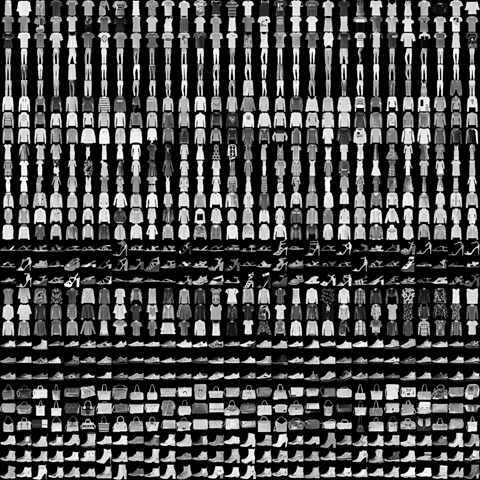


Bộ dữ liệu ban đầu của MNIST chứa rất nhiều chữ số viết tay. Các thành viên của cộng đồng AI/ML/Data Science yêu thích bộ dữ liệu này và sử dụng nó làm chuẩn để đánh giá các thuật toán của họ. Trong thực tế, MNIST thường là tập dữ liệu đầu tiên được các nhà nghiên cứu thử nghiệm. 
  
### Lấy dữ liệu

<a href="https://github.com/zalandoresearch/fashion-mnist#loading-data-with-other-machine-learning-libraries"> Nhiều thư viện ML </a> đã bao gồm tập dữ liệuFashion-MNIST/API.

Bạn có thể sử dụng các link sau để trực tiếp để tải tập dữ liệu về. Dữ liệu được lưu trữ ở cùng định dạng với dữ liệu <a href="http://yann.lecun.com/exdb/mnist/"> MNIST gốc. </a>


|Name|Content|Examples|Size|Link|MD5 Checksum|
| --- | --- | --- |---| --- | --- |
|rain-images-idx3-ubyte.gz	|training set images|60,000|26 MBytes|<a href="http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz"> Download </a>	|8d4fb7e6c68d591d4c3dfef9ec88bf0d|
| --- | --- | --- |---| --- | --- |
|train-labels-idx1-ubyte.gz|training set labels|60,000	|29 KBytes	|<a href="http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz"> Download </a> |	25c81989df183df01b3e8a0aad5dffbe|
| --- | --- | --- |---| --- | --- |
|t10k-images-idx3-ubyte.gz	|test set images|10,000|	4.3 MBytes|	<a href="http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz"> Download </a>	|bef4ecab320f06d8554ea6380940ec79|
| --- | --- | --- |---| --- | --- |
|t10k-labels-idx1-ubyte.gz|	test set labels	|10,000	|5.1 KBytes|	<a href="http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz"> Download </a>|	bb300cfdad3c16e7a12a480ee83cd310|

Ngoài ra, bạn có thể sao chép link GitHub dưới; bộ dữ liệu nằm trong thư mục data/fashion. Repo này cũng chứa một số script cho việc điểm chuẩn và hình ảnh hóa.

> git clone git@github.com:zalandoresearch/fashion-mnist.git

### Nhãn ( label )

Mỗi mẫu train và test được gán cho một trong các nhãn sau:

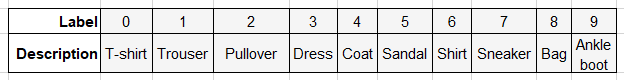


In [2]:
import numpy as np
from urllib import request
import gzip
import pickle

filenames = ["train-images-idx3-ubyte.gz",
             "train-labels-idx1-ubyte.gz",
             "t10k-images-idx3-ubyte.gz",
             "t10k-labels-idx1-ubyte.gz"]

def download_fashion_mnist(folder):
    base_url = "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/"
    for name in filenames:
        print("Downloading " + name + "...")
        
        # lưu vào folder data_fashion_mnist
        request.urlretrieve(base_url + name, folder + name)
    print("Download complete.")

# download dataset và lưu vào folder 'data_fashion_mnist/'
folder = 'data_fashion_mnist/'
download_fashion_mnist(folder)

Download complete.


In [1]:
import numpy as np
import gzip

# load training images
with gzip.open('data_fashion_mnist/train-images-idx3-ubyte.gz', 'rb') as f:
    X_train = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28*28)

# load testing images
with gzip.open('data_fashion_mnist/t10k-images-idx3-ubyte.gz', 'rb') as f:
    X_test = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28*28)

# load training labels
with gzip.open('data_fashion_mnist/train-labels-idx1-ubyte.gz', 'rb') as f:
    y_train = np.frombuffer(f.read(), np.uint8, offset=8)
    
# load testing labels
with gzip.open('data_fashion_mnist/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    y_test = np.frombuffer(f.read(), np.uint8, offset=8)
    

# check data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

np.save('data_fashion_mnist/X_train.npy', X_train)
np.save('data_fashion_mnist/y_train.npy', y_train)
np.save('data_fashion_mnist/X_test.npy', X_test)
np.save('data_fashion_mnist/y_test.npy', y_test)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


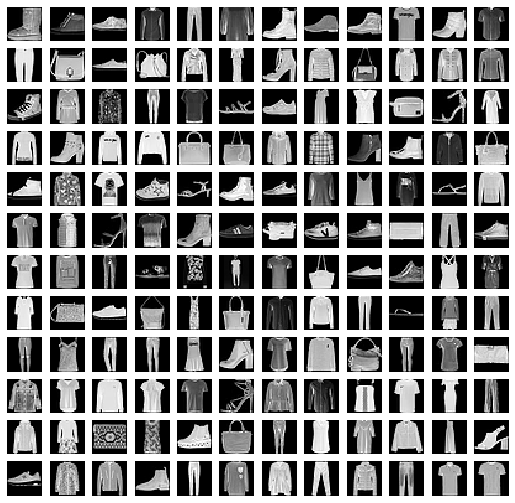

In [3]:
import matplotlib.pyplot as plt 
import numpy as np 

# Tạo dang sách 100 phần tử ngẫu nhiên từ X_train có 60.000 phần tử
indices = list(np.random.randint(X_train.shape[0],size=144))

fig =plt.figure(figsize=(9,9))
columns = 12
rows = 12
for i in range(1, columns*rows +1):
    img = X_train[indices[i-1]].reshape(28,28)
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)

# Tiền xử lý 

In [7]:
import os
import gzip
import numpy as np

X_train = np.load('data_fashion_mnist/X_train.npy', allow_pickle=True)
y_train = np.load('data_fashion_mnist/y_train.npy', allow_pickle=True)
X_test = np.load('data_fashion_mnist/X_test.npy', allow_pickle=True)
y_test = np.load('data_fashion_mnist/y_test.npy', allow_pickle=True)

# lấy số hàng của tập X_traint va X_test
m_train = 50000
m_test  = 10000
m_validation = 10000


### validation set
# Tạo list gồm 10000 số 
mask = list(range(m_train, m_train + m_validation)) 

# Tập con X_val gồm 10000 hình từ X_train
X_val = X_train[mask] 

# Lấy 10000 nhãn từ tập nhãn y_train
y_val = y_train[mask] 


### training set
# Tạo list gồm 50000 số từ 0 đến 49999
mask = list(range(m_train)) 

# Tạo lại tập X_train gồm 50000 hình 
X_train = X_train[mask] 

# Tạo lại tập nhãn y_train
y_train = y_train[mask] 


# Reshape data to rows
X_train = X_train.reshape(m_train, -1)
X_val   = X_val.reshape(m_validation, -1)
X_test  = X_test.reshape(m_test, -1)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (50000, 784)
y_train shape:  (50000,)
X_val shape:  (10000, 784)
y_val shape:  (10000,)
X_test shape:  (10000, 784)
y_test shape:  (10000,)


In [8]:
from PIL import Image

indices = list(np.random.randint(m_train,size=10))
for i in range(10):
    im = Image.fromarray(X_train[indices[i]].reshape(28,28))
    im.save("data_fashion_mnist/images/image_" + str(i) +".png")    